<a href="https://colab.research.google.com/github/EmanSalah2000/ExctractFeatureToDetectSleepingStage/blob/main/Assignment1_BCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installing the dataset

In [ ]:
!pip install mne
!pip install antropy

# important importing

In [ ]:
import mne
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from mne.time_frequency import psd_welch
from mne.preprocessing import  ICA
import seaborn as sns
import antropy as ent
from mne.datasets.sleep_physionet.age import fetch_data
from scipy.stats import moment 
import scipy 
import statistics

# load the dataset and some information from the data

In [ ]:
data1=mne.datasets.somato.data_path(path=None, force_update=False, update_path=True, download=True, verbose=None)
ALICE = 1
[alice_files] = fetch_data(subjects=[ALICE], recording=[1])


Using default location ~/mne_data for PHYSIONET_SLEEP...


In [ ]:
raw_train = mne.io.read_raw_edf(alice_files[0],stim_channel='marker',
                                misc=['rectal'])
annot_train = mne.read_annotations(alice_files[1])

raw_train.set_annotations(annot_train, emit_warning=False)

Extracting EDF parameters from C:\Users\Eman\mne_data\physionet-sleep-data\SC4011E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4011E0-PSG.edf, 7 x 8406000 (84060.0 s), ~12 kB, data not loaded>

In [ ]:

# raw_train.plot(start=60, duration=60,
#                scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7,
#                              misc=1e-1))

# mapping = {'rectal': 'misc',
#            'marker': 'misc'}

# raw_train.set_channel_types(mapping)

# raw_train.get_channel_types()


In [ ]:
pd.DataFrame(raw_train.get_data())

,0,1,2,3,4,5,6,7,8,9,...,8405990,8405991,8405992,8405993,8405994,8405995,8405996,8405997,8405998,8405999
0,0.000110,0.000105,0.000102,0.000102,0.000095,0.000095,0.000089,0.000087,0.000081,0.000083,...,9.315751e-06,0.000015,0.000021,0.000027,3.003956e-05,0.000024,0.000043,0.000028,0.000020,0.000012
1,0.000010,0.000013,0.000010,0.000008,0.000007,0.000005,0.000004,0.000006,0.000007,0.000010,...,-2.380830e-05,-0.000011,-0.000013,-0.000024,1.129426e-06,-0.000024,-0.000019,-0.000005,-0.000009,-0.000015
2,0.000153,0.000093,0.000154,0.000031,0.000119,0.000077,0.000134,0.000119,0.000115,0.000135,...,2.490842e-07,-0.000011,-0.000018,-0.000025,2.490842e-07,-0.000011,-0.000004,0.000001,0.000020,0.000095
3,-389.000000,-391.972192,-394.912133,-397.818750,-400.690983,-403.527785,-406.328126,-409.090989,-411.815372,-414.500291,...,5.780708e+01,58.216958,58.629924,59.045605,5.946363e+01,59.883631,60.305226,60.728039,61.151693,61.575807
4,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,3.237517e-06,0.000003,0.000003,0.000003,3.233608e-06,0.000003,0.000003,0.000003,0.000003,0.000003
5,37.306556,37.281757,37.256470,37.230705,37.204471,37.177778,37.150636,37.123057,37.095050,37.066628,...,3.740735e+01,37.407317,37.407282,37.407246,3.740721e+01,37.407171,37.407132,37.407093,37.407053,37.407012
6,911.000000,904.489605,897.843110,891.062475,884.149750,877.107069,869.936646,862.640783,855.221858,847.682329,...,9.076584e+02,908.094824,908.531439,908.967971,9.094042e+02,909.839764,910.274517,910.708170,911.140470,911.571163


In [ ]:
pd.DataFrame(annot_train)

,onset,duration,description,orig_time
0,0.0,21540.0,Sleep stage W,None
1,21540.0,360.0,Sleep stage 1,None
2,21900.0,60.0,Sleep stage 2,None
3,21960.0,60.0,Sleep stage 1,None
4,22020.0,180.0,Sleep stage 2,None
...,...,...,...,...
121,50130.0,390.0,Sleep stage R,None
122,50520.0,30.0,Sleep stage 1,None
123,50550.0,480.0,Sleep stage R,None
124,51030.0,33030.0,Sleep stage W,None


In [ ]:
set(raw_train.get_channel_types())
set(raw_train.annotations.description)
raw_train.get_data().shape[1]/raw_train.info['sfreq']/60/60
set(raw_train.ch_names)

{'EEG Fpz-Cz',
 'EEG Pz-Oz',
 'EMG submental',
 'EOG horizontal',
 'Event marker',
 'Resp oro-nasal',
 'Temp rectal'}

# plotting the data in frequency domain 

Effective window size : 20.480 (s)


<ipython-input-9-a508e21a2767>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_train.plot_psd() # time domain


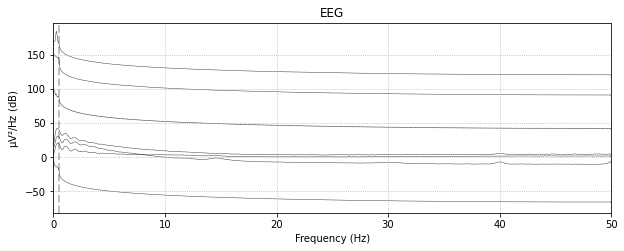

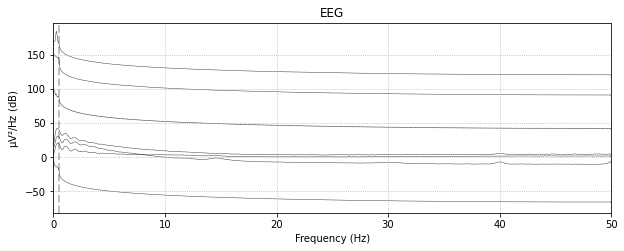

In [ ]:
raw_train.plot_psd() # time domain

# plotting the data in time domain 

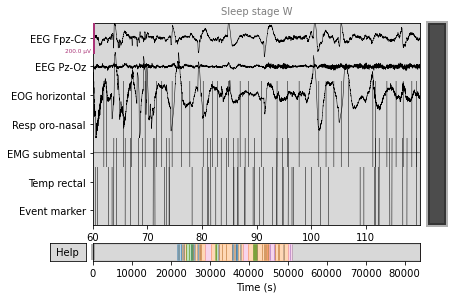

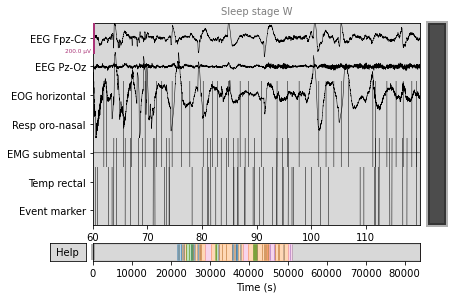

In [ ]:
raw_train.plot(start=60, duration=60,
               scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7,
                             misc=1e-1))

# stages of sleeping 

Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage R', 'Sleep stage W']


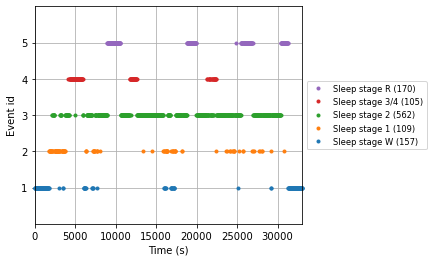

In [ ]:
annotation_desc_2_event_id = {'Sleep stage W': 1,
                              'Sleep stage 1': 2,
                              'Sleep stage 2': 3,
                              'Sleep stage 3': 4,
                              'Sleep stage 4': 4,
                              'Sleep stage R': 5}

# keep last 30-min wake events before sleep and first 30-min wake events after
# sleep and redefine annotations on raw data
annot_train.crop(annot_train[1]['onset'] - 30 * 60,
                 annot_train[-2]['onset'] + 30 * 60)
raw_train.set_annotations(annot_train, emit_warning=False)

events_train, _ = mne.events_from_annotations(
    raw_train, event_id=annotation_desc_2_event_id, chunk_duration=30.)

# create a new event_id that unifies stages 3 and 4
event_id = {'Sleep stage W': 1,
            'Sleep stage 1': 2,
            'Sleep stage 2': 3,
            'Sleep stage 3/4': 4,
            'Sleep stage R': 5}

# plot events
fig = mne.viz.plot_events(events_train, event_id=event_id,
                          sfreq=raw_train.info['sfreq'],
                          first_samp=events_train[0, 0])

# reject eog and eeg signal 

In [ ]:
tmax = 30. - 1. / raw_train.info['sfreq']
reject_criteria = dict(
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV
epochs_train = mne.Epochs(raw=raw_train, events=events_train,
                          event_id=event_id, tmin=0., tmax=tmax, baseline=None)

print(epochs_train)

Not setting metadata
Not setting metadata
1103 matching events found
No baseline correction applied
0 projection items activated
<Epochs |  1103 events (good & bad), 0 - 29.99 sec, baseline off, ~12 kB, data not loaded,
 'Sleep stage 1': 109
 'Sleep stage 2': 562
 'Sleep stage 3/4': 105
 'Sleep stage R': 170
 'Sleep stage W': 157>


In [ ]:
# tmax = 30. - 1. / raw_train.info['sfreq']
# reject_criteria = dict(
#                        eeg=150e-6   ,    # 150 µV
#                        eog=250e-6
# )       # 250 µV
# epochs_train = mne.Epochs(raw=raw_train, events=events_train,
#                           event_id=event_id, tmin=0., tmax=tmax, baseline=None, reject=reject_criteria)

# print(epochs_train)


In [ ]:
epochs_train.get_data().shape

Loading data for 1103 events and 3000 original time points ...
0 bad epochs dropped


(1103, 7, 3000)

# print stages of sleeping with epochs  with time domain 

Sleep stage 1
Loading data for 109 events and 3000 original time points ...
Not setting metadata
Not setting metadata
109 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


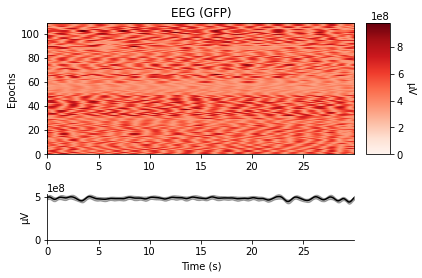

Sleep stage 2
Loading data for 562 events and 3000 original time points ...
Not setting metadata
Not setting metadata
562 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


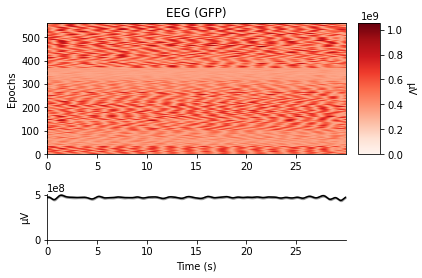

Sleep stage 3/4
Loading data for 105 events and 3000 original time points ...
Not setting metadata
Not setting metadata
105 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


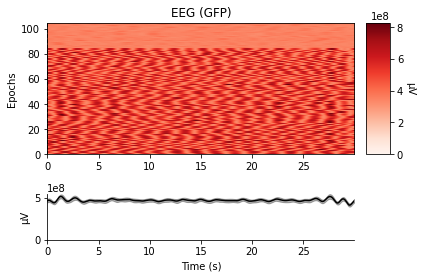

Sleep stage R
Loading data for 170 events and 3000 original time points ...
Not setting metadata
Not setting metadata
170 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


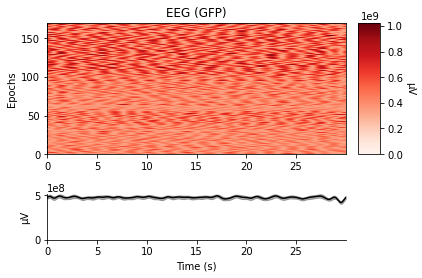

Sleep stage W
Loading data for 157 events and 3000 original time points ...
Not setting metadata
Not setting metadata
157 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
combining channels using "gfp"


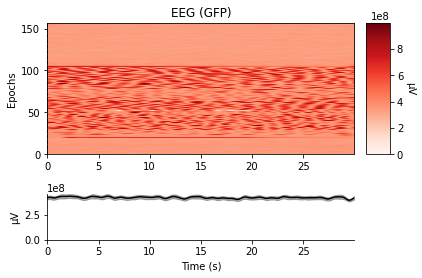

In [ ]:
# fig, ax = plt.subplots(ncols=1)
stages = sorted(event_id.keys())  
for stage in stages:
    print(stage)
    epochs_train[stage].plot_image()

# print stages of sleeping with epochs  with frequency  domain 

Loading data for 109 events and 3000 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 562 events and 3000 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 105 events and 3000 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 170 events and 3000 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 157 events and 3000 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


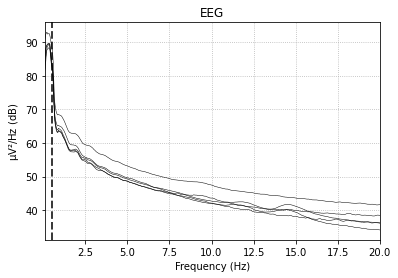

In [ ]:
fig, ax = plt.subplots(ncols=1)
stages = sorted(event_id.keys())  
for stage in stages:
      epochs_train[stage].plot_psd(area_mode=None, ax=ax,
                              fmin=0.1, fmax=20., show=False,
                              average=True, spatial_colors=False)

In [ ]:
epochs_train.get_data().shape

Loading data for 1103 events and 3000 original time points ...


(1103, 7, 3000)

# prepare data for feature extraction
       1.  mean 
       2. spectral entropy
       3. moment 2 3
       4. bands [delta- theta - alpha - beta -gamma]
      

# mean 

In [ ]:
x = epochs_train.get_data()[:,:2,:]
y = epochs_train.events[:,2]

features = np.mean(x, axis=2)
features.shape
print(features)
x.shape

Loading data for 1103 events and 3000 original time points ...
[[ 1.62967521e-07  1.29387057e-07]
 [-4.63429548e-07  2.20554335e-07]
 [ 3.86678388e-07  1.62667481e-07]
 ...
 [-4.97006105e-07 -4.20447700e-08]
 [ 8.43731380e-07  1.42187220e-07]
 [-1.92525519e-07  2.65821734e-07]]


(1103, 2, 3000)

Sleep stage 1
(109, 2)
Sleep stage 2
(562, 2)
Sleep stage 3/4
(105, 2)
Sleep stage R
(170, 2)
Sleep stage W
(157, 2)


Text(0, 0.5, 'Density')

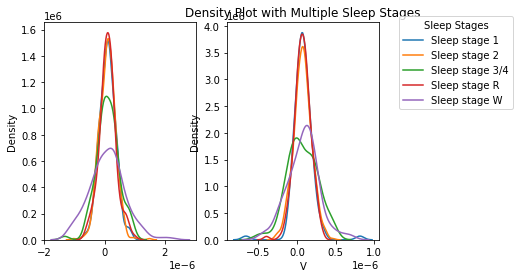

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
    print(stage)
    f = features[y==event_id[stage]]
    print(f.shape)
    sns.kdeplot(f[:,0], label = stage, ax=ax1)
    sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages')
plt.xlabel('V')
plt.ylabel('Density')

# spectral entropy 

In [ ]:
feat=ent.spectral_entropy(x, sf=100, method='fft', normalize=True) # sampling frequency  #fft fast fourier transform 

Sleep stage 1
(109, 2)
Sleep stage 2
(562, 2)
Sleep stage 3/4
(105, 2)
Sleep stage R
(170, 2)
Sleep stage W
(157, 2)


(1103, 2)

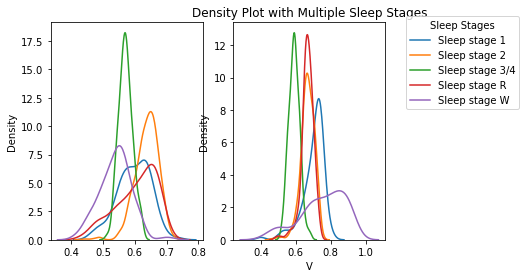

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
    print(stage)
    f = feat[y==event_id[stage]]
    print(f.shape)
    sns.kdeplot(f[:,0], label = stage, ax=ax1)
    sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages')
plt.xlabel('V')
plt.ylabel('Density')
feat.shape

# moment 

In [ ]:
fe=scipy.stats.moment(x, moment=2, axis=2, nan_policy='propagate')
fe.shape

(1103, 2)

Sleep stage 1
(109, 2)
Sleep stage 2
(562, 2)
Sleep stage 3/4
(105, 2)
Sleep stage R
(170, 2)
Sleep stage W
(157, 2)


(1103, 2)

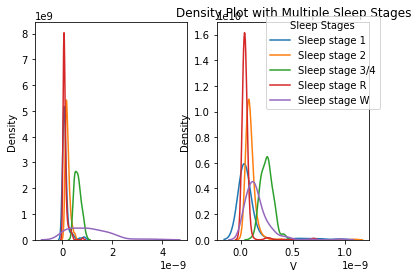

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
    print(stage)
    f = fe[y==event_id[stage]]
    print(f.shape)
    sns.kdeplot(f[:,0], label = stage, ax=ax1)
    sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages')
plt.xlabel('V')
plt.ylabel('Density')
fe.shape

In [ ]:
fe1=scipy.stats.moment(x, moment=3, axis=2, nan_policy='propagate')
fe1.shape

(1103, 2)

Sleep stage 1
(109, 2)
Sleep stage 2
(562, 2)
Sleep stage 3/4
(105, 2)
Sleep stage R
(170, 2)
Sleep stage W
(157, 2)


(1103, 2)

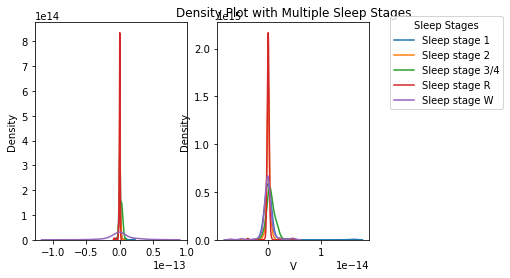

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
    print(stage)
    f = fe1[y==event_id[stage]]
    print(f.shape)
    sns.kdeplot(f[:,0], label = stage, ax=ax1)
    sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages')
plt.xlabel('V')
plt.ylabel('Density')
fe1.shape

In [ ]:
po=np.var(x, axis=2, dtype=None, out=None, ddof=0, keepdims=0)
po.shape

(1103, 2)

Sleep stage 1
(109, 2)
Sleep stage 2
(562, 2)
Sleep stage 3/4
(105, 2)
Sleep stage R
(170, 2)
Sleep stage W
(157, 2)


(1103, 2)

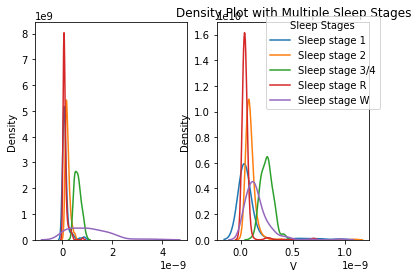

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
stages = sorted(event_id.keys())  
for stage in stages:
    print(stage)
    f = po[y==event_id[stage]]
    print(f.shape)
    sns.kdeplot(f[:,0], label = stage, ax=ax1)
    sns.kdeplot(f[:,1], label = stage, ax=ax2)
# Plot formatting
plt.legend(title = 'Sleep Stages', loc='best',bbox_to_anchor=(1.1, 1.05))
plt.title('Density Plot with Multiple Sleep Stages')
plt.xlabel('V')
plt.ylabel('Density')
po.shape

# bands [delta - theta -alpha - beta - gamma]

{'Delta': 0.0005372688911333042, 'Theta': 0.00028634296461433354, 'Alpha': 0.00023723128903790677, 'Beta': 0.0003009745985166144, 'Gamma': 0.00027943766328023884}
0    Delta
1    Theta
2    Alpha
3     Beta
4    Gamma
Name: band, dtype: object
0    0.000537
1    0.000286
2    0.000237
3    0.000301
4    0.000279
Name: val, dtype: float64


,band,val
0,Delta,0.000537
1,Theta,0.000286
2,Alpha,0.000237
3,Beta,0.000301
4,Gamma,0.000279


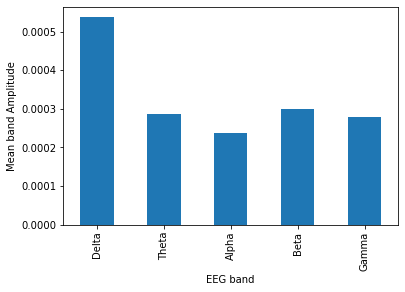

In [ ]:
fs = 100                                # Sampling rate (512 Hz)
data = x  # 2 sec of data b/w 0.0-100.0

# Get real amplitudes of FFT (only in postive frequencies)
fft_vals = np.absolute(np.fft.rfft(data))

# Get frequencies for amplitudes in Hz
fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)

# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
eeg_band_fft = dict()
for band in eeg_bands:  
    freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                       (fft_freq <= eeg_bands[band][1]))[0]
    eeg_band_fft[band] = np.mean(fft_vals[freq_ix])
    
    


# Plot the data (using pandas here cause it's easy)
import pandas as pd
df = pd.DataFrame(columns=['band', 'val'])
df['band'] = eeg_bands.keys()
df['val'] = [eeg_band_fft[band] for band in eeg_bands]
ax = df.plot.bar(x='band', y='val', legend=False)
ax.set_xlabel("EEG band")
ax.set_ylabel("Mean band Amplitude")


print(eeg_band_fft)
print(df['band'])
print(df['val'] )
pd.DataFrame(df)